In [1]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate
import plotly.offline as pyo
import numpy as np 
#pd.set_option('display.max_rows', None)

# The United States Of America, Where are you safe ?
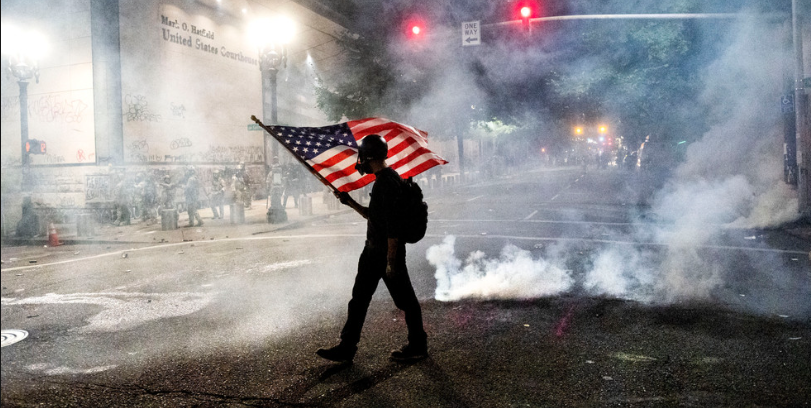
---



 ## Subject 

 We chose to study the crime activity in the USA. 
 We based our analysis on an dataset created by the media *The Marshall Project*.
 The dataframe can be found here : https://github.com/themarshallproject/city-crime/blob/master/data/ucr_crime_1975_2015.csv

In [2]:
df_crime = pd.read_csv("ucr_crime_1975_2015.csv")

# Questions

We grew up with a lot of americain action movies, filled with violence. New York as the headquarter of the italian mafia, Boston, home of a lot of criminal organization. But it is accurate ? Do theses cities are the most dangerous ? 

In [3]:
nb_cities = len(df_crime["department_name"].unique())
l_cities = df_crime["department_name"].unique().tolist()

The dataset give information on 68 cities and the national mean

In [4]:
print("The cities are: \n", *l_cities, sep='\n')

The cities are: 

Albuquerque, N.M.
Arlington, Texas
Atlanta
Aurora, Colo.
Austin, Texas
Baltimore
Baltimore County, Md.
Boston
Buffalo, N.Y.
Charlotte-Mecklenburg, N.C.
Chicago
Cincinnati
Cleveland
Columbus, Ohio
Dallas
Denver
Detroit
El Paso, Texas
Fairfax County, Va.
Fort Worth, Texas
Fresno, Calif.
Honolulu
Houston
Indianapolis
Jacksonville, Fla.
Kansas City, Mo.
Las Vegas
Long Beach, Calif.
Los Angeles
Los Angeles County, Calif.
Louisville, Ky.
Memphis, Tenn.
Mesa, Ariz.
Miami
Miami-Dade County, Fla.
Milwaukee
Minneapolis
Montgomery County, Md.
Nashville, Tenn.
Nassau County, N.Y.
National
New Orleans
New York City
Newark, N.J.
Oakland, Calif.
Oklahoma City
Omaha, Neb.
Orlando, Fla.
Philadelphia
Phoenix
Pittsburgh
Portland, Ore.
Prince George's County, Md.
Raleigh, N.C.
Sacramento, Calif.
Salt Lake City
San Antonio
San Diego
San Francisco
San Jose
Seattle
St. Louis, Mo.
Suffolk County, N.Y.
Tampa, Fla.
Tucson, Ariz.
Tulsa, Okla.
Virginia Beach, Va.
Washington, D.C.
Wichita, Kan.


In this dataframe, we explore the numbers of 5 crimes : 

1.   Violent crime : An unlawful physical attack or threat of attack
2.   homicide
3.   Rape
4.   Robery
5.   Aggravated assault : a felony that may involve an assault resulting in serious bodily harm or an assault committed with a weapon or with the intent to commit a serious crime




## At the end of this study we would like the answers to the following questions :

 1. Which city wins each year the Oscar of the most violent city ?
 2. Which city has won the least safe city award the most in 40 years. 
 3. How has violence evolved in general between 1975 and 2015 ?  
 4. Which aggression will we most likely experience in New York in 2015 ? 
 5. Back in 2015, if I were to go on vacation, what places should I avoid ?  
 6. What was the crime trend over a 40-year period? 
 7. Back in 2015, What crime you will most likely experienced during a trip in the us ?
  

# Data exploration 


In [5]:
df_crime.head()


,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN
1,TX22001,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283,NaN,NaN
2,GAAPD00,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512,NaN,NaN
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN
4,TX22701,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830,NaN,NaN


In [6]:
# For the purpose of our analyzise we can drop the following columns
df_crime = df_crime.drop(columns=['ORI','url','source','months_reported','total_pop'])

In [7]:
# a quick look of the variables 
print(df_crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2829 non-null   int64  
 1   department_name   2829 non-null   object 
 2   homs_sum          2795 non-null   float64
 3   rape_sum          2754 non-null   float64
 4   rob_sum           2754 non-null   float64
 5   agg_ass_sum       2753 non-null   float64
 6   violent_crime     2794 non-null   float64
 7   violent_per_100k  2794 non-null   float64
 8   homs_per_100k     2795 non-null   float64
 9   rape_per_100k     2754 non-null   float64
 10  rob_per_100k      2754 non-null   float64
 11  agg_ass_per_100k  2753 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 265.3+ KB
None


In [8]:
df_crime.drop(columns=['year']).describe()

,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
count,2795.000000,2754.000000,2754.000000,2753.000000,2.794000e+03,2794.000000,2795.000000,2754.000000,2754.000000,2753.000000
mean,398.385331,416.278867,4000.245098,4405.146023,2.963255e+04,1093.049952,15.372760,59.305140,459.968134,566.595538
std,2281.276402,479.811934,8653.902965,6977.293769,1.728630e+05,676.884703,12.350651,31.971735,340.903545,369.437018
min,1.000000,15.000000,83.000000,15.000000,1.540000e+02,16.494563,0.205464,1.640771,11.460508,1.606613
25%,32.000000,176.250000,1032.000000,1467.000000,3.014750e+03,625.082639,6.955241,35.773523,210.245093,319.091928
50%,64.000000,291.000000,1940.000000,2597.000000,5.135500e+03,949.676451,11.984468,55.900545,374.398220,487.484783
75%,131.000000,465.000000,3609.750000,4556.000000,9.058500e+03,1409.508836,20.231759,77.795869,612.005983,728.238584
max,24703.000000,3899.000000,107475.000000,71030.000000,1.932274e+06,4352.834209,94.735602,199.301908,2337.518708,2368.216602


In [9]:
# Take a look at the number of NA values
df_crime.isna().sum()

year                 0
department_name      0
homs_sum            34
rape_sum            75
rob_sum             75
agg_ass_sum         76
violent_crime       35
violent_per_100k    35
homs_per_100k       34
rape_per_100k       75
rob_per_100k        75
agg_ass_per_100k    76
dtype: int64

In [10]:
# Take a look at the missing value.
is_NaN = df_crime.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_crime[row_has_NaN]
rows_with_NaN

,year,department_name,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
30,1975,"Louisville, Ky.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1975,National,20510.0,NaN,NaN,NaN,1039710.0,487.8,9.6,NaN,NaN,NaN
99,1976,"Louisville, Ky.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,1976,National,18780.0,NaN,NaN,NaN,1004210.0,467.8,8.7,NaN,NaN,NaN
168,1977,"Louisville, Ky.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2014,National,14164.0,NaN,NaN,NaN,1153022.0,361.6,4.4,NaN,NaN,NaN
2766,2015,"Baltimore County, Md.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2772,2015,Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2800,2015,National,15696.0,NaN,NaN,NaN,1197704.0,372.6,4.9,NaN,NaN,NaN


In [11]:
# We only drop row with more that 10 NaN
df_crime = df_crime[df_crime.isnull().sum(axis=1) < 10]

In [12]:
# It's acceptable to keep the National rows even if there are some nan values.
# The missing values won't impact our analysis
is_NaN = df_crime.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_crime[row_has_NaN]
rows_with_NaN

,year,department_name,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
40,1975,National,20510.0,NaN,NaN,NaN,1039710.0,487.8,9.600000,NaN,NaN,NaN
109,1976,National,18780.0,NaN,NaN,NaN,1004210.0,467.8,8.700000,NaN,NaN,NaN
178,1977,National,19120.0,NaN,NaN,NaN,1029580.0,475.9,8.800000,NaN,NaN,NaN
247,1978,National,19560.0,NaN,NaN,NaN,1085550.0,497.8,9.000000,NaN,NaN,NaN
316,1979,National,21460.0,NaN,NaN,NaN,1208030.0,548.9,9.800000,NaN,NaN,NaN
385,1980,National,23040.0,NaN,NaN,NaN,1344520.0,596.6,10.200000,NaN,NaN,NaN
454,1981,National,22520.0,NaN,NaN,NaN,1361820.0,593.5,9.800000,NaN,NaN,NaN
523,1982,National,21010.0,NaN,NaN,NaN,1322390.0,570.8,9.100000,NaN,NaN,NaN
592,1983,National,19308.0,NaN,NaN,NaN,1258087.0,538.1,8.300000,NaN,NaN,NaN
661,1984,National,18692.0,NaN,NaN,NaN,1273282.0,539.9,7.900000,NaN,NaN,NaN


# Data Preparation/Cleaning 

In [13]:
# Rename the column
df_crime = df_crime.rename(columns={"department_name": "city"})

In [14]:
# We decided to add the latitude and longitude to our datafram in order to do some spacial investigation 
df_crime.insert(3, 'latitude', 0)
df_crime.insert(4, 'longitude', 0)
df_crime.head()

,year,city,homs_sum,latitude,longitude,rape_sum,rob_sum,agg_ass_sum,violent_crime,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
0,1975,"Albuquerque, N.M.",30.0,0,0,181.0,819.0,1353.0,2383.0,832.523984,10.480789,63.234092,286.125532,472.683571
1,1975,"Arlington, Texas",5.0,0,0,28.0,113.0,132.0,278.0,247.159445,4.445314,24.893757,100.464091,117.356283
2,1975,Atlanta,185.0,0,0,443.0,3887.0,3518.0,8033.0,1637.436198,37.710158,90.300540,792.320989,717.104512
3,1975,"Aurora, Colo.",7.0,0,0,44.0,171.0,389.0,611.0,523.762173,6.000549,37.717734,146.584831,333.459059
4,1975,"Austin, Texas",33.0,0,0,190.0,529.0,463.0,1215.0,404.460719,10.985353,63.249001,176.098535,154.127830


In [15]:
# Get the gps coordinates of the cities
df_cities = pd.read_excel("gps_city.xlsx")
df_cities

,city,lat,lng
0,"Albuquerque, N.M.",35.106766,-106.629181
1,"Arlington, Texas",32.705002,-97.122780
2,Atlanta,-84.387982,33.748995
3,"Aurora, Colo.",39.710835,-104.812500
4,"Austin, Texas",30.267153,-97.7430608
...,...,...,...
64,"Tulsa, Okla.",36.153980,-95.992775
65,"Virginia Beach, Va.",36.863140,-76.015778
66,"Washington, D.C.",38.900497,-77.007507
67,"Wichita, Kan.",37.6871761,-97.330053


In [16]:
# Association of the GPS coordinates and the city 
key_list = list(df_crime['city'])
dict_lookup_lat = dict(zip(df_cities['city'], df_cities['lat']))
dict_lookup_lng = dict(zip(df_cities['city'], df_cities['lng']))
df_crime['latitude'] = [dict_lookup_lat[item] for item in key_list]
df_crime['longitude'] = [dict_lookup_lng[item] for item in key_list]

In [17]:
df_crime.head()

,year,city,homs_sum,latitude,longitude,rape_sum,rob_sum,agg_ass_sum,violent_crime,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
0,1975,"Albuquerque, N.M.",30.0,35.106766,-106.629181,181.0,819.0,1353.0,2383.0,832.523984,10.480789,63.234092,286.125532,472.683571
1,1975,"Arlington, Texas",5.0,32.705002,-97.122780,28.0,113.0,132.0,278.0,247.159445,4.445314,24.893757,100.464091,117.356283
2,1975,Atlanta,185.0,-84.387982,33.748995,443.0,3887.0,3518.0,8033.0,1637.436198,37.710158,90.300540,792.320989,717.104512
3,1975,"Aurora, Colo.",7.0,39.710835,-104.812500,44.0,171.0,389.0,611.0,523.762173,6.000549,37.717734,146.584831,333.459059
4,1975,"Austin, Texas",33.0,30.267153,-97.7430608,190.0,529.0,463.0,1215.0,404.460719,10.985353,63.249001,176.098535,154.127830


# Data Vizualisation 



#  <font color='violet'>Back in 2015, if I were to go on vacation, what places should I avoid?</font> 




In [18]:
# Data Prep for the map 
df_crime_geo_2015 = df_crime.loc[(df_crime['city'] != 'National') & (df_crime['year'] == 2015)]
df_crime_geo_2015.reset_index(drop=True, inplace=True)
df_crime_geo_2015 = df_crime_geo_2015.sort_values(by=["violent_per_100k"], ascending=False)
df_crime_geo_2015.reset_index(drop=True, inplace=True)

In [19]:
# Get an idea of the distribution to better choose our 
fig = px.histogram(df_crime_geo_2015, x="violent_per_100k",
labels={
    "violent_per_100k": "Number of violent crimes for 100k inhabitants"},
title="Dsitribution of the violent crimes for 100k inhabitants")
fig.show()

The histogram shows us that a majority of cities have a number of violent crimes between 400 and 500 per 100k inhabitant.

In [20]:
# Define the intervals
number_of_violent_crimes = ["1600+","1400-1600","1201-1400","1001-1200","801-1000","701-800","601-700","501-600","301-500","101-300","1-100"]

In [21]:
# Get the elements in the intervals
tuple1 = (0, df_crime_geo_2015[df_crime_geo_2015.violent_per_100k > 1600].index[-1]+1)
tuple2 = (tuple1[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 1400) & (df_crime_geo_2015.violent_per_100k  <=1600)].index[-1]+1)
tuple3 = (tuple2[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 1201) & (df_crime_geo_2015.violent_per_100k  <=1400)].index[-1]+1)
tuple4 = (tuple3[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 1001 ) & (df_crime_geo_2015.violent_per_100k  <=1200)].index[-1]+1)
tuple5 = (tuple4[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 801 ) & (df_crime_geo_2015.violent_per_100k <=1000)].index[-1]+1)
tuple6 = (tuple5[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 701) & (df_crime_geo_2015.violent_per_100k  <=800)].index[-1]+1)
tuple7 = (tuple6[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 601) & (df_crime_geo_2015.violent_per_100k  <=700)].index[-1]+1)
tuple8 = (tuple7[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 501) & (df_crime_geo_2015.violent_per_100k  <=600)].index[-1]+1)
tuple9 = (tuple8[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 301) & (df_crime_geo_2015.violent_per_100k  <=500)].index[-1]+1)
tuple10 = (tuple8[1], df_crime_geo_2015[(df_crime_geo_2015.violent_per_100k > 101) & (df_crime_geo_2015.violent_per_100k  <=300)].index[-1]+1)
tuple11 = (tuple10[1], df_crime_geo_2015[df_crime_geo_2015.violent_per_100k <= 100].index[-1]+1)

In [22]:
# Index of the row include in the intervals
limits = [tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, tuple7, tuple8, tuple9, tuple10, tuple11]
limits

[(0, 3),
 (3, 7),
 (7, 9),
 (9, 16),
 (16, 26),
 (26, 31),
 (31, 39),
 (39, 50),
 (50, 59),
 (50, 64),
 (64, 65)]

In [23]:
# Color scale for the different intervals
colors = ["#180000","#420D09","#8B0001 ","#E34234","#9E1711","#B12E21", "#DC1C13", "#EA4C46", "#F07470", "#F1959B","#F6BDC0"]

In [24]:
# Figure 

fig = go.Figure()
stage_counter = 0
for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_crime_geo_2015[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['city'],
        marker = dict(
            size = df_sub['violent_per_100k']*0.10,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{}'.format(number_of_violent_crimes[stage_counter])))
    stage_counter = stage_counter+1
annotation = {
    'xref': 'paper',  
    'yref': 'paper',  
    'x': 0.0, 
    'y': 0.0, 
    'text': '*calculated for 100k inhabitants',
    'showarrow': False,
    'arrowhead': 0,
    'font': {'size': 10, 'color': 'black'},
    'font_family' : 'Open Sans'
}

fig.update_layout({'annotations': [annotation]},
        title_text = 'Violent crimes* cases in the United States by city in 2015',
        font_family="Open Sans",
        title_x=0.5,
        showlegend = True,
        legend_title = 'Range of violent crimes',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            projection=go.layout.geo.Projection(type = 'albers usa'),
        )
    )

Based on this graph, I'll avoid Memphis, Okland, Detroit. Honolu seems to be a suitable destination. 


# <font color='violet'>How has violence evolved in general between 1975 and 2015 ? </font> 

In [25]:
# Data preparation for the next graph
df_crime_evolution_over_time = df_crime.loc[(df_crime['city'] != 'National') ]
df_crime_evolution_over_time.reset_index(drop=True, inplace=True)
df_crime_evolution_over_time.insert(2, 'nb_crime', 0)
df_crime_evolution_over_time.insert(3, 'crime_cat', 0)
df_crime_evolution_over_time = df_crime_evolution_over_time.drop(columns=['latitude','homs_sum','rape_sum','rob_sum','agg_ass_sum','violent_crime','longitude'])


In [26]:
# Dataframe transformation, we create a column with the type of crime (instead of having a column for each row)
df_crime_evolution_over_time = df_crime_evolution_over_time.loc[df_crime_evolution_over_time.index.repeat(5)]
df_crime_evolution_over_time.reset_index(drop=True, inplace=True)

In [27]:
# counts to browse the lines
a= 0 
b= 1 
c= 2 
d= 3 
e= 4 
for i in range(2754): 
    # Affect to the new column the crime's number and the categorie
    df_crime_evolution_over_time.loc[a,["nb_crime"]] = df_crime_evolution_over_time.at[a,"violent_per_100k"]
    df_crime_evolution_over_time.loc[a,["crime_cat"]] = "violent"
    df_crime_evolution_over_time.loc[b,["nb_crime"]] = df_crime_evolution_over_time.at[b,"homs_per_100k"]
    df_crime_evolution_over_time.loc[b,["crime_cat"]] = "homs"
    df_crime_evolution_over_time.loc[c,["nb_crime"]] = df_crime_evolution_over_time.at[c,"rape_per_100k"]
    df_crime_evolution_over_time.loc[c,["crime_cat"]] = "rape"
    df_crime_evolution_over_time.loc[d,["nb_crime"]] = df_crime_evolution_over_time.at[d,"rob_per_100k"]  
    df_crime_evolution_over_time.loc[d,["crime_cat"]] = "rob"
    df_crime_evolution_over_time.loc[e,["nb_crime"]] = df_crime_evolution_over_time.at[e,"agg_ass_per_100k"]
    df_crime_evolution_over_time.loc[e,["crime_cat"]] = "agg_ass"
    # Go to the next lines 
    a = a+5
    b = b+5
    c = c+5
    d = d+5
    e = e+5

df_crime_evolution_over_time.tail()

,year,city,nb_crime,crime_cat,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
13765,2015,"Wichita, Kan.",984.803398,violent,984.803398,6.926203,89.527582,188.033574,700.31604
13766,2015,"Wichita, Kan.",6.926203,homs,984.803398,6.926203,89.527582,188.033574,700.31604
13767,2015,"Wichita, Kan.",89.527582,rape,984.803398,6.926203,89.527582,188.033574,700.31604
13768,2015,"Wichita, Kan.",188.033574,rob,984.803398,6.926203,89.527582,188.033574,700.31604
13769,2015,"Wichita, Kan.",700.316040,agg_ass,984.803398,6.926203,89.527582,188.033574,700.31604


In [28]:
# Data preparation for the graph
df_crime_evolution_over_time["sum"] = df_crime_evolution_over_time["violent_per_100k"] + df_crime_evolution_over_time["homs_per_100k"] +df_crime_evolution_over_time["rape_per_100k"] + df_crime_evolution_over_time["rob_per_100k"] +df_crime_evolution_over_time["agg_ass_per_100k"] 
df_crime_evolution_over_time= df_crime_evolution_over_time.sort_values(by=["sum","city","nb_crime"], ascending=False)
df_crime_evolution_over_time.head()

,year,city,nb_crime,crime_cat,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,sum
5180,1990,Miami,4352.834209,violent,4352.834209,35.978446,83.391903,2279.192744,1954.271116,8705.668418
5183,1990,Miami,2279.192744,rob,4352.834209,35.978446,83.391903,2279.192744,1954.271116,8705.668418
5184,1990,Miami,1954.271116,agg_ass,4352.834209,35.978446,83.391903,2279.192744,1954.271116,8705.668418
5182,1990,Miami,83.391903,rape,4352.834209,35.978446,83.391903,2279.192744,1954.271116,8705.668418
5181,1990,Miami,35.978446,homs,4352.834209,35.978446,83.391903,2279.192744,1954.271116,8705.668418


In [29]:
df_agg = df_crime_evolution_over_time.groupby(['year', 'city','nb_crime']).agg({'crime_cat':'first','sum':'first'}).reset_index()

In [30]:
df_agg.head(10)

,year,city,nb_crime,crime_cat,sum
0,1975,"Albuquerque, N.M.",10.480789,homs,1665.047967
1,1975,"Albuquerque, N.M.",63.234092,rape,1665.047967
2,1975,"Albuquerque, N.M.",286.125532,rob,1665.047967
3,1975,"Albuquerque, N.M.",472.683571,agg_ass,1665.047967
4,1975,"Albuquerque, N.M.",832.523984,violent,1665.047967
5,1975,"Arlington, Texas",4.445314,homs,494.318889
6,1975,"Arlington, Texas",24.893757,rape,494.318889
7,1975,"Arlington, Texas",100.464091,rob,494.318889
8,1975,"Arlington, Texas",117.356283,agg_ass,494.318889
9,1975,"Arlington, Texas",247.159445,violent,494.318889


In [31]:
fig = px.histogram(df_agg, x="city",y="nb_crime",
                   histnorm="",
                   title='Evolution over time of the 5 types of crimes* for each city ',
                   labels={
                     "city": "City",
                     "nb_crime": "Number of crimes"},
                   color='crime_cat', barmode='group',
                   height=1000,animation_frame='year',
                   category_orders = {'year' : ['1975',	'1976',	'1977','1978','1979','1980','1981','1982','1983','1984','1985','1986',
                                                '1987','1988',	'1989','1990','1991','1992','1993','1994','1995','1996','1997','1998',
                                                '1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'
                                                ,'2012','2013','2014','2015']},
                   range_y =[0, 5000])

# Animation duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 400
# position bar
fig['layout']['sliders'][0]['pad']=dict(r= 70, t= 200)
# position the buttons 
fig.update_layout(updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=-0.25,
                  x=-0.05,
                  xanchor='left',
                  yanchor='top')
                        ])
fig.update_yaxes(dtick=500)
annotation = {
    'xref': 'paper',  
    'yref': 'paper',  
    'x': 1.0, 
    'y': 1.0, 
    'text': '*calculated for 100k inhabitants',
    'showarrow': False,
    'arrowhead': 0,
    'font': {'size': 10, 'color': 'black'},
    'font_family' : 'Open Sans'
}
fig.update_layout({'annotations': [annotation]})
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("weighted by", "")))
fig.for_each_yaxis(lambda a: a.update(title_text=a.title.text.replace("weighted by", "")))
fig.show()



**The criminality tend to decrease over the years**.  
This decreasing trend may also allow us to have confidence in the data from the pre-computer years. Indeed, one might think that in those days, loss of information was common, but the data seems to contradict this argument. However, it is necessary to qualify, the laws have evolved since 40 years.  
**We see that the most commited crime is the Violet Crime.**

# <font color='violet'>Which city wins each year the Oscar of the most violent city ?</font> 

In [32]:
 # Data preparation graph
most_dangerous_city_per_year = []

l_years = df_agg["year"].unique().tolist()
for i in l_years: 
  tampon = []
  max = df_agg[df_agg['year']== i ]['sum'].max()
  year = i 
  city=df_agg.loc[(df_agg['year'] == i) & (df_agg['sum'] == max ), 'city'].values[0]
  
  tampon.append(year)
  tampon.append(city)
  tampon.append(max)

  most_dangerous_city_per_year.append(tampon)

most_dangerous_city_per_year

df_most_dangerous_city_per_year = pd.DataFrame(most_dangerous_city_per_year,columns =['year','city','Criminality Sum'])
df_most_dangerous_city_per_year.head()

,year,city,Criminality Sum
0,1975,Detroit,4242.678946
1,1976,Detroit,4452.289933
2,1977,"St. Louis, Mo.",3798.781000
3,1978,"Newark, N.J.",4202.297354
4,1979,"Newark, N.J.",6109.214801


In [33]:
fig = px.line(df_most_dangerous_city_per_year, 
              x="year", 
              y="Criminality Sum",
              title = "Evolution per year of the city with the most crimes*",
              labels={"year": "Year"},
              width=900, height=400,
              markers = True)

fig.update_traces(textposition="bottom left")

annotation = {
    'xref': 'paper',  
    'yref': 'paper',  
    'x': 0.0, 
    'y': 0.0, 
    'text': '*calculated for 100k inhabitants',
    'showarrow': False,
    'arrowhead': 0,
    'font': {'size': 10, 'color': 'black'},
    'font_family' : 'Open Sans'
}

fig.update_layout({'annotations': [annotation]})
fig.add_annotation(x=1975, y=4242.678946,
            text="Detroit",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=1981, y=7405.047694,
            text="Detroit",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=1984, y=5455.189868,
            text="Miami",
            showarrow=False,
            yshift=-10)

fig.add_annotation(x=1987, y=6226.211799,
            text="Tampa, Fla.",
            showarrow=False,
            yshift=-10)

fig.add_annotation(x=1990, y=8705.668418,
            text="Miami",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=1995, y=7970.580098,
            text="Newark, N.J.",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=1997, y=6096.966961,
            text="Atlanta",
            showarrow=False,
            yshift=-10)

fig.add_annotation(x=2004, y=4151.660634,
            text="St. Louis, Mo.",
            showarrow=False,
            yshift=-10)

fig.add_annotation(x=2006, y=4961.384229,
            text="St. Louis, Mo.",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=2009, y=4140.109457,
            text="St. Louis, Mo.",
            showarrow=False,
            yshift=-10)

fig.add_annotation(x=2010, y=4755.827100,
            text="Detroit",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=2015, y=3634.242104,
            text="St. Louis, Mo.",
            showarrow=False,
            yshift=-10)



fig.show()

The trend towards a decrease in crime is confirmed by this graph. However, we note that several cities seem to have been the winner of the most dangerous city several times.


# <font color='violet'>Which city has won the least safe city award the most in 40 years?</font> 

In [34]:
count = df_most_dangerous_city_per_year['city'].value_counts()
df_count = count.to_frame().reset_index()
df_count = df_count.rename(columns={"index": "city", "city": "count"})

fig = px.pie(df_count, values='count', names='city',
             title = "Number of times cities had the highest number of crimes of the 68 cities studied over a 40-year period ")
fig.update_traces(textposition='inside', textinfo='value+label')
fig.update_layout(showlegend=False) 
annotation = {
    'xref': 'paper',  
    'yref': 'paper',  
    'x': 0.0, 
    'y': 0.0, 
    'text': '*calculated for 100k inhabitants',
    'showarrow': False,
    'arrowhead': 0,
    'font': {'size': 10, 'color': 'black'},
    'font_family' : 'Open Sans'
}

fig.update_layout({'annotations': [annotation]})
fig.show()


And the winner is........ Newark with 10 appearances as the most dangerous city, followed closely by Altanta !  
Spoile Alert, after some research, we found that in 2016 the winner was Detroit ! 

In [35]:
df_crime_experienced = df_crime_evolution_over_time[df_crime_evolution_over_time["year"]==2015]
df_crime_experienced.head()

,year,city,nb_crime,crime_cat,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,sum
13730,2015,"St. Louis, Mo.",1817.121052,violent,1817.121052,59.288226,82.940444,564.499598,1110.392784,3634.242104
13734,2015,"St. Louis, Mo.",1110.392784,agg_ass,1817.121052,59.288226,82.940444,564.499598,1110.392784,3634.242104
13733,2015,"St. Louis, Mo.",564.499598,rob,1817.121052,59.288226,82.940444,564.499598,1110.392784,3634.242104
13732,2015,"St. Louis, Mo.",82.940444,rape,1817.121052,59.288226,82.940444,564.499598,1110.392784,3634.242104
13731,2015,"St. Louis, Mo.",59.288226,homs,1817.121052,59.288226,82.940444,564.499598,1110.392784,3634.242104


In [36]:
# what crime you will most likely experienced during a trip in the us 

df_crime_experienced__ = df_crime_experienced.loc[(df_crime_experienced['city'] == 'New York City') & (df_crime_experienced['year'] == 2015)]
df_crime_experienced__.reset_index(drop=True, inplace=True)
df_crime_experienced.reset_index(drop=True, inplace=True)


#count = df_crime_experienced['crime_cat'].value_counts()
#df_count = count.to_frame().reset_index()
#df_count = df_count.rename(columns={"index": "crime_cat", "count": "count"})
#df_count
df_crime_experienced.head()
df_crime_experienced__

,year,city,nb_crime,crime_cat,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,sum
0,2015,New York City,585.765574,violent,585.765574,4.116545,26.242971,198.178873,357.227184,1171.531148
1,2015,New York City,357.227184,agg_ass,585.765574,4.116545,26.242971,198.178873,357.227184,1171.531148
2,2015,New York City,198.178873,rob,585.765574,4.116545,26.242971,198.178873,357.227184,1171.531148
3,2015,New York City,26.242971,rape,585.765574,4.116545,26.242971,198.178873,357.227184,1171.531148
4,2015,New York City,4.116545,homs,585.765574,4.116545,26.242971,198.178873,357.227184,1171.531148


# <font color='violet'>Back in 2015, What crime you will most likely experienced during a trip in the us ?</font> 

In [37]:
fig = px.pie(df_crime_experienced, values='nb_crime', names='crime_cat',
             title = "Sum by crime category of crime over the year 2015")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False) 
annotation = {
    'xref': 'paper',  
    'yref': 'paper',  
    'x': 0.0, 
    'y': 0.0, 
    'text': '*calculated for 100k inhabitants',
    'showarrow': False,
    'arrowhead': 0,
    'font': {'size': 10, 'color': 'black'},
    'font_family' : 'Open Sans'
}

fig.update_layout({'annotations': [annotation]})
fig.show()

Half of the crimes comitted are violent crimes followed by aggraveted assault. Fortunately, homicides are rare.

# <font color='violet'>Which aggression will we most likely experience in New York in 2015 ?</font> 

In [38]:
fig = px.pie(df_crime_experienced__, values='nb_crime', names='crime_cat',
             title = "What crime you will most likely experienced during a trip in New York ")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False) 
annotation = {
    'xref': 'paper',  
    'yref': 'paper',  
    'x': 0.0, 
    'y': 0.0, 
    'text': '*calculated for 100k inhabitants',
    'showarrow': False,
    'arrowhead': 0,
    'font': {'size': 10, 'color': 'black'},
    'font_family' : 'Open Sans'
}

fig.update_layout({'annotations': [annotation]})
fig.show()

We find here the same national proportions.

In [39]:
def multi_plot(this_df,addAll=True):
    def create_layout_button(column):
            return dict(label = column,
                        method = 'update',
                        args = [{'visible': this_df.columns.isin([column]),
                                'title': column,
                                'showlegend': False}])

    fig = go.Figure()

    for column in this_df.columns.to_list():
        fig.add_trace(
            go.Histogram(
                histfunc="avg", 
                x=this_df.index,
                y=this_df[column],
                name = column)
        )
    button_all = dict(label = 'All type of crime',
                        method = 'update',
                        args = [{'visible': this_df.columns.isin(this_df.columns),
                                'title': 'All',
                                'showlegend':True}])
    fig.update_layout(
        updatemenus=[go.layout.Updatemenu (
            active = 0,
            buttons = ([button_all] * addAll) + list(this_df.columns.map(lambda column: create_layout_button(column)))
            )
        ])
    fig.update_layout(title_text='Overview of the cumulative number of crimes* in the 68 cities per year ')
    annotation = {
    'xref': 'paper',  
    'yref': 'paper',  
    'x': 1.0, 
    'y': 1.0, 
    'text': '*calculated for 100k inhabitants',
    'showarrow': False,
    'arrowhead': 0,
    'font': {'size': 10, 'color': 'black'},
    'font_family' : 'Open Sans'
}

    fig.update_layout({'annotations': [annotation]})
    fig.update_xaxes(title_text="Years")
    fig.update_yaxes(title_text="Number of crimes cases")
    fig.show()

# create a dataframe with only the data we wanna plot (  by specifying columns to keep )
columns_crime = df_crime.columns.to_list()[9:13]
df_crime_filtered = df_crime.set_index('year')[columns_crime]
multi_plot(df_crime_filtered)

In [40]:
df_crime_without_national = df_crime.loc[df_crime["city"]!="National"]
df_crime_without_national=df_crime_without_national.rename(columns={"violent _per_100k": "Violents", 
                                          "homs _per_100k": "Homicides",
                                          "rage _per_100k": "Rapes", 
                                          "rob _per_100k": "Robberies",
                                          "agg_ass _per_100k": "Aggravated Assault"})
df_crime_without_national.head()
fig = go.Figure()

country_list = list(df_crime['city'].unique())
crime_list = df_crime.columns.to_list()[9:14]


print(crime_list)

['violent_per_100k', 'homs_per_100k', 'rape_per_100k', 'rob_per_100k', 'agg_ass_per_100k']


In [41]:
for country in country_list:
    fig.add_trace(
        go.Scatter(
            x = df_crime_without_national['year'][df_crime_without_national['city']==country],
            y = df_crime_without_national["rob_sum"][df_crime_without_national['city']==country],
            name = country, visible = True
        )
    )
    
button1 = []
button2 = []

button = dict(label = "All",
                  method = "update",
                  args=[{"visible": True}])

button1.append(button)
for i, country in enumerate(country_list):
    args = [False] * len(country_list)
    args[i] = True
    
    button = dict(label = country,
                  method = "update",
                  args=[{"visible": args}])
    
    button1.append(button)


button = dict(label = "All",
                  method = "update",
                  args=[{"visible": True}])

button2.append(button)
for i, type_crime in enumerate(crime_list):
    args = [False] * len(crime_list)
    args[i] = True
    
    button = dict(label = type_crime,
                  method = "update",
                  args=[{"visible": args}])
    
    button2.append(button)

fig.update_layout(
    updatemenus=[
        dict(
                    active=0,
                    type="dropdown",
                    buttons=button1,
                    x = 0.06,
                    y = 1.02,
                    xanchor = 'left',
                    yanchor = 'bottom'
                ),
                  dict(
                    active=0,
                    type="dropdown",
                    buttons=button2,
                    x = 0.60,
                    y = 1.02,
                    xanchor = 'left',
                    yanchor = 'bottom'
                ),          
    ], 
    autosize=False,
    width=1000,
    height=800
)

fig.update_layout(title_text='Overview of the dataset by city and crime category',
    annotations=[
        dict(text="City", x=0, xref="paper", y=1.06, yref="paper",
                             align="left", showarrow=False),
        dict(text="Crime Category", x=0.51, xref="paper", y=1.06,
                             yref="paper", showarrow=False),
    ])

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Crime cases")
fig.show()

This graph gives sum up our data. We can see clearly the value for each city. 

 ## Conclusion 

Add a paragraph to explain what you have learnt and when else you want to explore in the dataset

The United States of America seems to be a dangerous country, a lot of violent crime but we are surprised that there are not more homicides because of the gun laws. Very surprised by the top 3 most dangerous cities. Do you know the city Newark before our analysis ? Because it's the most dangerous city and we never heard of it ! Newark is an American city, the most populous city in the state of New Jersey. Located in Essex County, it is part of the New York City suburbs.

For the next step of the project, we'll need to complete our dataframe and/or complete our analysis by focusing on a city (e.g NYC : interesting data here : https://crime-data-explorer.app.cloud.gov/pages/explorer/crime/crime-trend)

